# Neural Networks

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


In [10]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255





In [11]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)

test_labels=to_categorical(test_labels)

In [12]:
network.fit(train_images , train_labels ,epochs=5 ,batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2646 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0712 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0516 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0391 - accuracy: 0.9879


In [13]:
test_loss,test_acc=network.evaluate(test_images , test_labels)
print('testacc:',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9787
testacc: 0.9786999821662903


# data representation of neural network

In [14]:
import numpy as np

In [15]:
x=np.array(12)

In [16]:
x


array(12)

In [17]:
x.ndim

0

In [18]:
x=np.array([12,3,6,14])
x

array([12,  3,  6, 14])

In [19]:
x.ndim

1

In [20]:
x=np.array([[2,7,8],[4,9,3]])

In [21]:
x


array([[2, 7, 8],
       [4, 9, 3]])

In [22]:
x.ndim

2

In [23]:
x=np.array([[[4,7,8],[7,9,9]]])

In [24]:
x


array([[[4, 7, 8],
        [7, 9, 9]]])

In [25]:
x.ndim

3

In [26]:
from keras.datasets import mnist
(train_images ,train_labels),(test_images,test_labels)=mnist.load_data()

In [27]:

print(train_images.ndim)

3


In [28]:
print(train_images.shape)

(60000, 28, 28)


In [29]:
print(train_images.dtype)

uint8


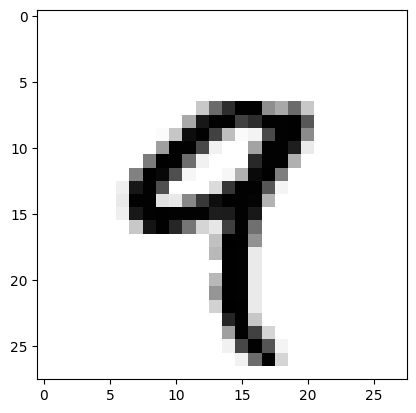

In [30]:
digit =train_images[4]
import matplotlib.pyplot as plt 
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [31]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [32]:
my_slice=train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice=train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)


In [34]:
batch=train_images[:128]

In [35]:
batch=train_images[128:256]

# neural network with tensor operation

In [36]:
from keras import layers
dense_layer = layers.Dense(128, activation='relu') 
dense_layer_output = dense_layer(network.output)

dense_layer_output 

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>

In [37]:
def naive_relu(x):
    assert len(x.shape)==2
    x=x.copy()
    for i in  range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]=max(x[i,j],0)
    return x


In [38]:
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape==y.shape
    x=x.copy()
    for i in  range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x


In [39]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    x=x.copy()
    for i in  range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[j]
    return x

In [40]:
import numpy as np
x=np.random.random((64,3,32,10))
y=np.random.random((32,10))
z=np.maximum(x,y)



In [41]:
z

array([[[[0.56419633, 0.99395446, 0.42524519, ..., 0.61362486,
          0.74605179, 0.39435647],
         [0.66098011, 0.56518408, 0.98463179, ..., 0.29157359,
          0.23692371, 0.99663506],
         [0.41914704, 0.58928105, 0.87905216, ..., 0.98325703,
          0.99287343, 0.73409344],
         ...,
         [0.68092106, 0.56751775, 0.95411682, ..., 0.14897789,
          0.59974615, 0.85944991],
         [0.73971018, 0.82511615, 0.92756397, ..., 0.57330899,
          0.25832542, 0.96648768],
         [0.87352291, 0.43721125, 0.75851628, ..., 0.86351747,
          0.34092643, 0.97980668]],

        [[0.7373332 , 0.80602881, 0.41927427, ..., 0.66896475,
          0.18246564, 0.39435647],
         [0.66098011, 0.32463741, 0.98463179, ..., 0.09093165,
          0.86377817, 0.99663506],
         [0.41914704, 0.176519  , 0.96480012, ..., 0.85953707,
          0.99287343, 0.73409344],
         ...,
         [0.26835345, 0.56751775, 0.95411682, ..., 0.86739285,
          0.70103461, 0.5

In [42]:
import numpy as np 

In [43]:
def naive_vector_dot(x,y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0]==y.shape[0]
    z=0
    for i in  range(x.shape[0]):
        z+=x[i]*y[i]
    return z

In [44]:
import numpy as np
def naive_matrix_vector_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    z=np.zeros(x.shape[0])
    for i in  range(x.shape[0]):
        for j in range (x.shape[1]):
            z+=x[i,j]*y[i]
    return z

In [45]:
def naive_matrix_vector_dot(x,y):
    
    z=np.zeros(x.shape[0])
    for i in  range(x.shape[0]):
        z[i]=naive_vector_dot(x[i,:],y)
    return z



In [46]:
def naive_matrix_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==2
    assert x.shape[1]==y.shape[0]
    z=np.zeros((x.shape[0],y.shape[1]))
    for i in  range(x.shape[0]):
        for j in range (y.shape[1]):
            row_x=x[i,:]
            column_y=y[:,j]
            z[i,j]=naive_vector_dot(row_x,column_y)
    return z


# reshaping


In [47]:
x=np.array([[0.,1.],[2.,4.],[4.,5.]])

In [48]:
x.shape


(3, 2)

In [49]:
x.reshape((6,1))


array([[0.],
       [1.],
       [2.],
       [4.],
       [4.],
       [5.]])

In [50]:
x=x.reshape((2,3))

In [51]:
x=np.zeros((300,20))

In [52]:
x=np.transpose(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
(x.shape)

(20, 300)